In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from preprocess import fix_merged_headers
import heatmap as heatmap

print('starting')

starting


In [2]:
data_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\data.xlsx",
                        sheet_name="human corona")
fix_merged_headers(data_df)
bg_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\data.xlsx",
                      sheet_name="human control")

pi_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\protein_info.xlsx")

sample_columns = []
for c in data_df.columns:
    if c[-2:] in ['.1', '.2', '.3']:
        sample_columns.append(c)
        print(c)

name_column = 'T: Protein names_x'
control_column = "RPA%"
# control_column = "FBS_%"

heatmap.sample_columns = sample_columns
heatmap.name_column = name_column

xl_writer = pd.ExcelWriter('output.xlsx', mode='w')

C.1
C.2
C.3
C@BSA.1
C@BSA.2
C@BSA.3
C@FBS.1
C@FBS.2
C@FBS.3
C@BS.1
C@BS.2
C@BS.3
P.1
P.2
P.3
P@BSA.1
P@BSA.2
P@BSA.3
P@FBS.1
P@FBS.2
P@FBS.3
P@BS.1
P@BS.2
P@BS.3
T.1
T.2
T.3
T@BSA.1
T@BSA.2
T@BSA.3
T@FBS.1
T@FBS.2
T@FBS.3
T@BS.1
T@BS.2
T@BS.3


In [3]:
raw_df : pd.DataFrame = data_df.merge(bg_df,
                                      left_on='T: Protein IDs',
                                      right_on='T: Majority protein IDs',
                                      how='outer')
raw_df[name_column] = raw_df[name_column].combine_first(raw_df['T: Protein names_y'])
raw_df['function'] = raw_df['function_x'].combine_first(raw_df['function_y'])

raw_df['T: Protein IDs'] = raw_df['T: Protein IDs'].combine_first(raw_df['T: Majority protein IDs'])
raw_df = raw_df.merge(pi_df,
                      left_on='T: Protein IDs',
                      right_on='ProteinID',
                      how='outer')

raw_df.to_excel("raw_merge.xlsx")


In [4]:
#make substituted data frame; 0 and NaN are replaced with substituted values; then renormalized
sf = raw_df.copy()

abundance_columns = [control_column] + sample_columns

#minimum value, replace zero with 2x lower than lowest detected
mdf = sf[abundance_columns]
sample_min = mdf[mdf > 0].min().min()
print("Sample min is: {}".format(sample_min))
sample_min = sample_min / 2

#only consider secreted proteins = outside of cell (thus relevant for corona)
sf = sf.drop(sf[~sf['Location'].str.contains('Secreted')].index)
sf.sort_values(by=['function_x', name_column], inplace=True)

#replace values, renormalize
for c in abundance_columns:
    sf[c] = sf[c].replace(0, sample_min)
    sf[c] = sf[c].replace(np.nan, sample_min)
    sf[c] = sf[c] / sf[c].sum()

sf.to_excel(excel_writer=xl_writer, sheet_name="subs sec")
for c in sample_columns:
    sf[c] = sf[c] / sf[control_column]

sf['enrichment_magnitude'] = np.log10(sf[sample_columns]).abs().median(axis=1)
sf.to_excel(excel_writer=xl_writer, sheet_name="subs diff sec")

Sample min is: 7.426542996298846e-06


In [5]:
#make normal data frame = no substitutions
df = raw_df.copy()

for c in sample_columns:
    df[c] = df[c] / df[control_column]


df['enrichment_magnitude'] = np.log10(df[sample_columns]).abs().median(axis=1)
df.sort_values(by=['function_x'], inplace=True)
df.to_excel(excel_writer=xl_writer, sheet_name="raw diff expr")



Text(0.5, 1.0, 'Raw enrichment, only proteins detected in all samples and control')

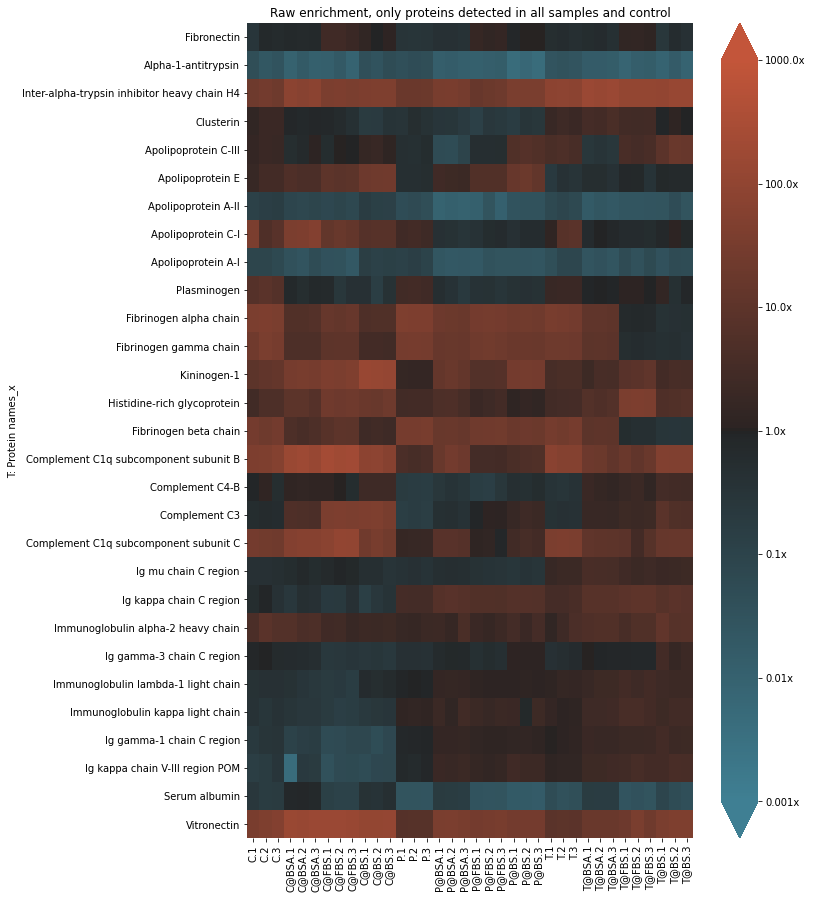

In [6]:
mpl.pyplot.figure(figsize=(10,15))
heatmap.heatmap_only_common_proteins(df)
mpl.pyplot.title("Raw enrichment, only proteins detected in all samples and control")

Text(0.5, 1.0, 'Raw Enrichment, standins for low and high values')

<Figure size 720x2880 with 0 Axes>

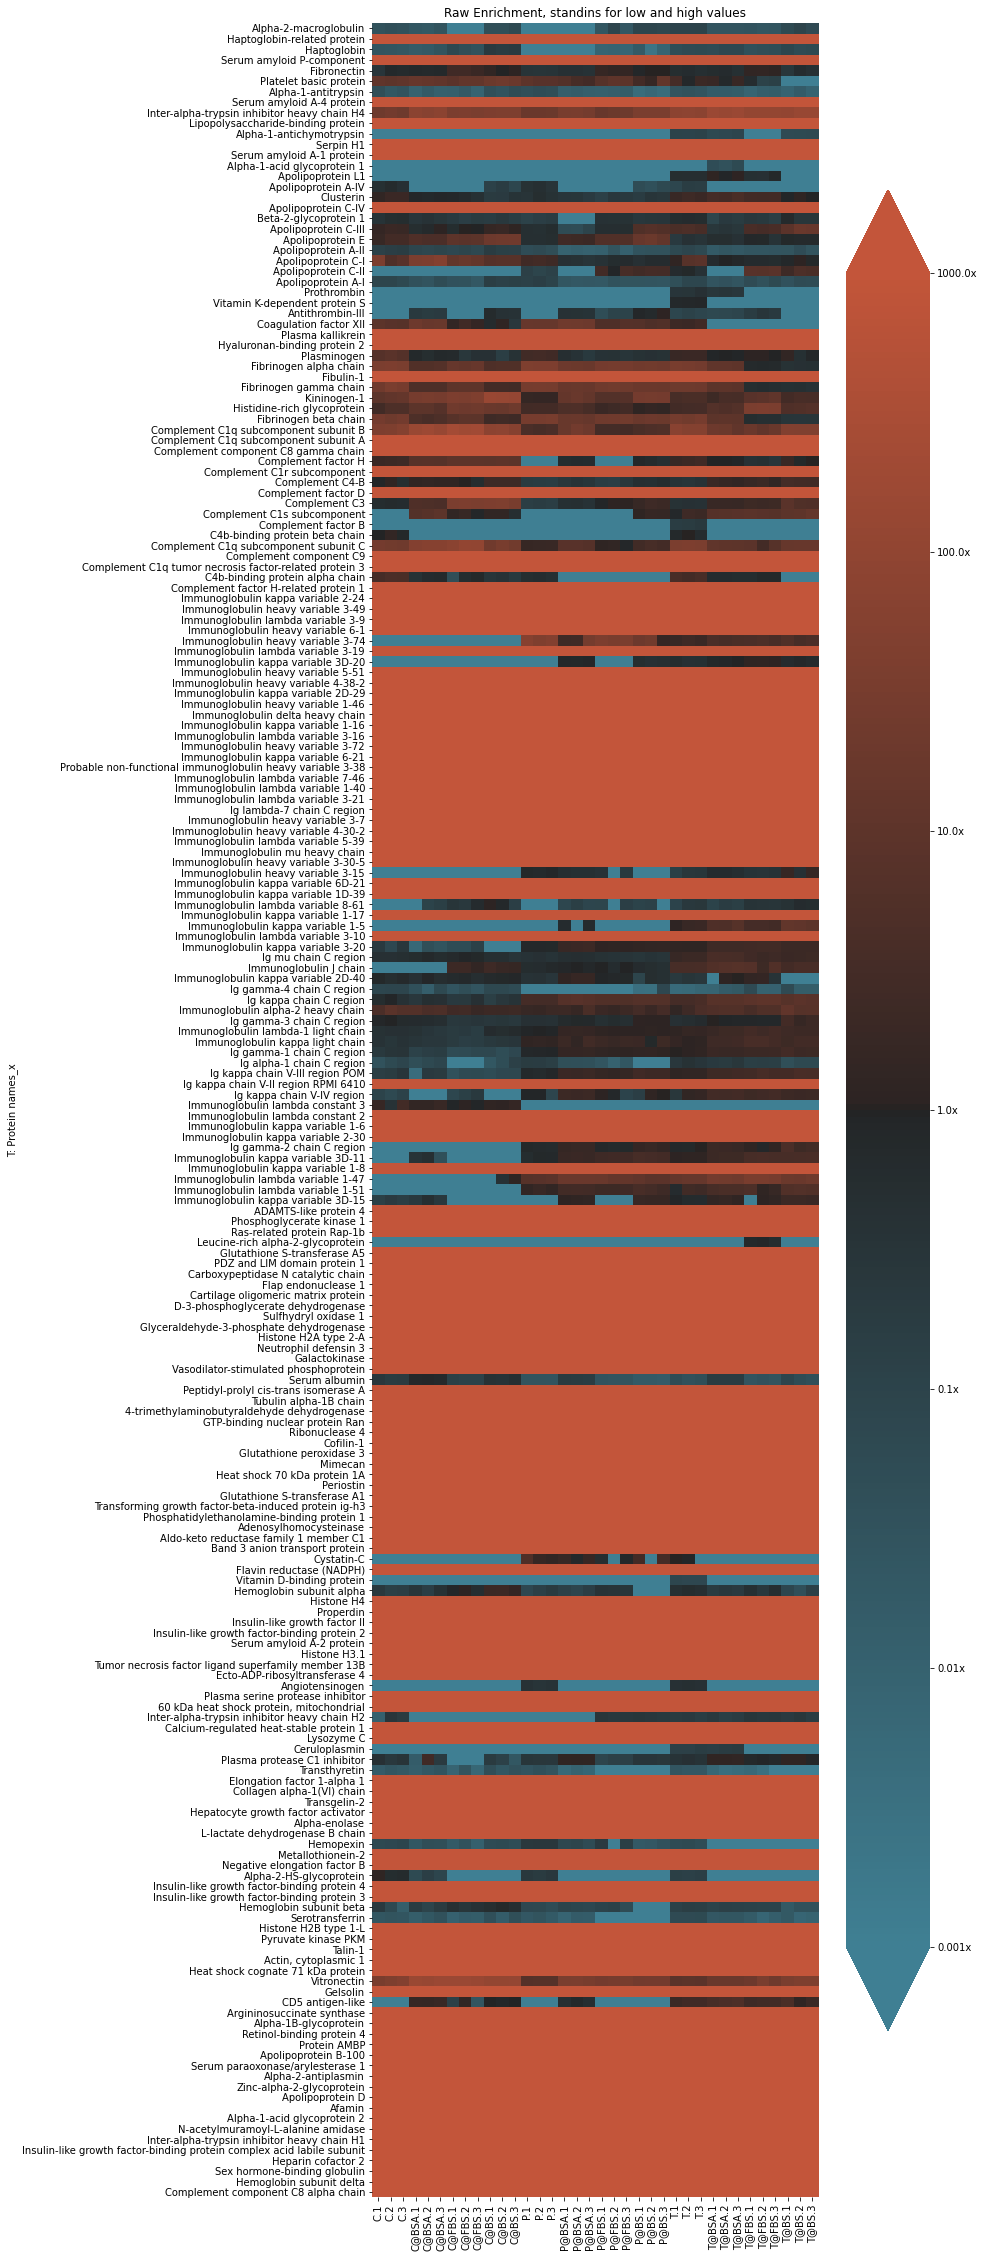

In [7]:
mpl.pyplot.figure(figsize=(10,40))
heatmap.heatmap_standin_infinites(df)
mpl.pyplot.title('Raw Enrichment, standins for low and high values')

Text(0.5, 1.0, 'Enrichment, values substituted for non-detected proteins')

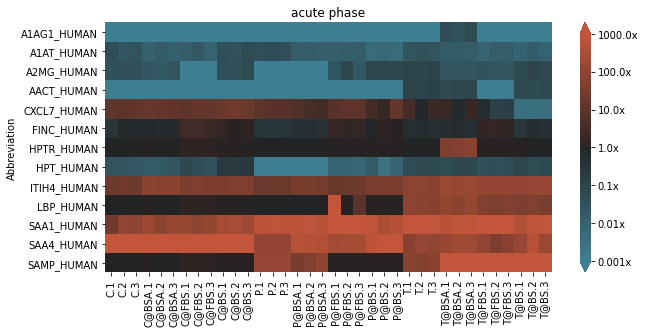

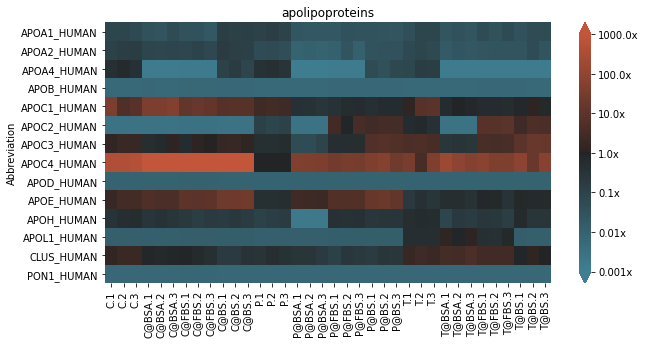

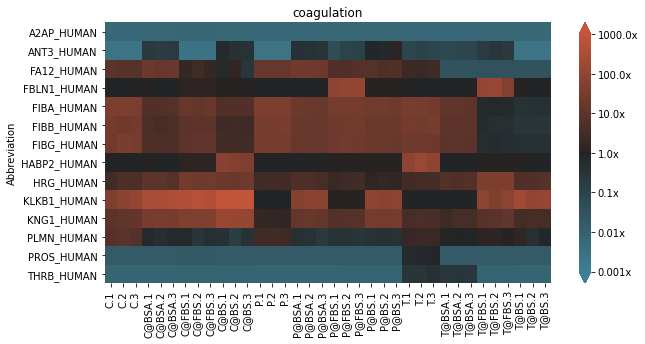

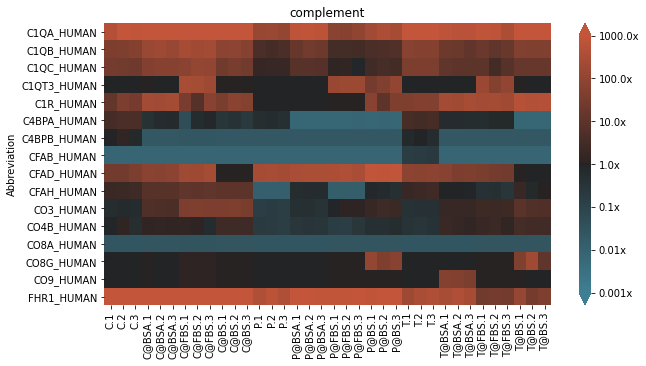

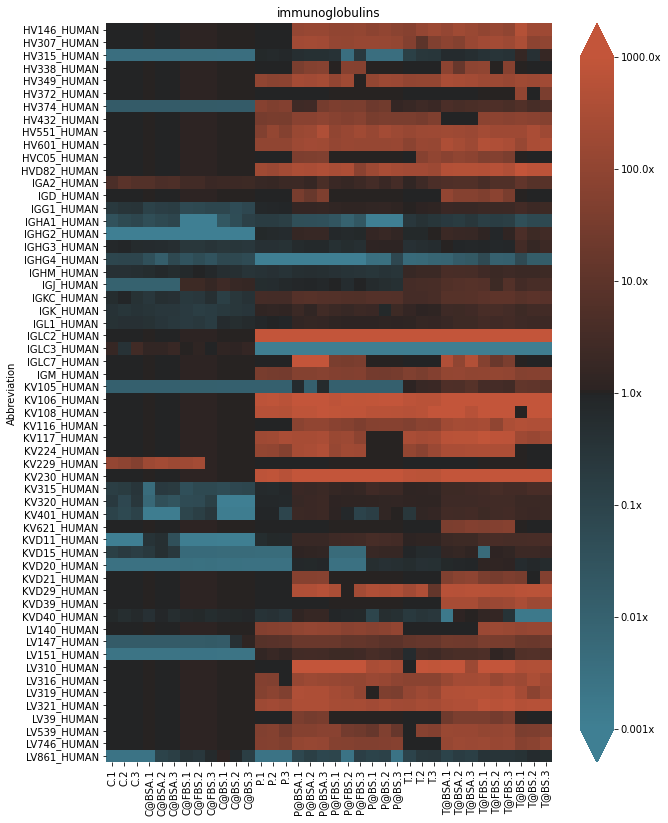

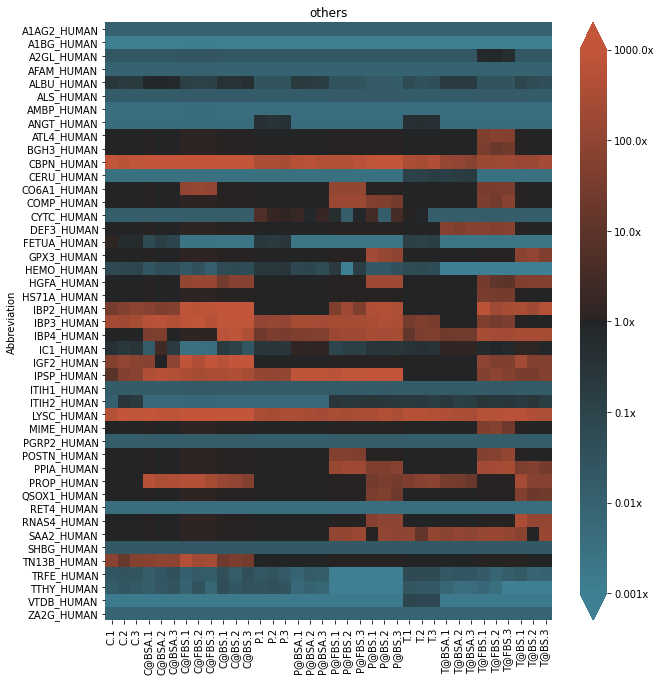

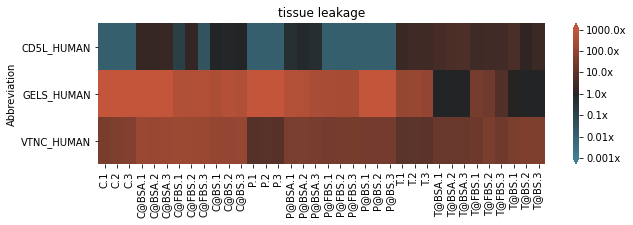

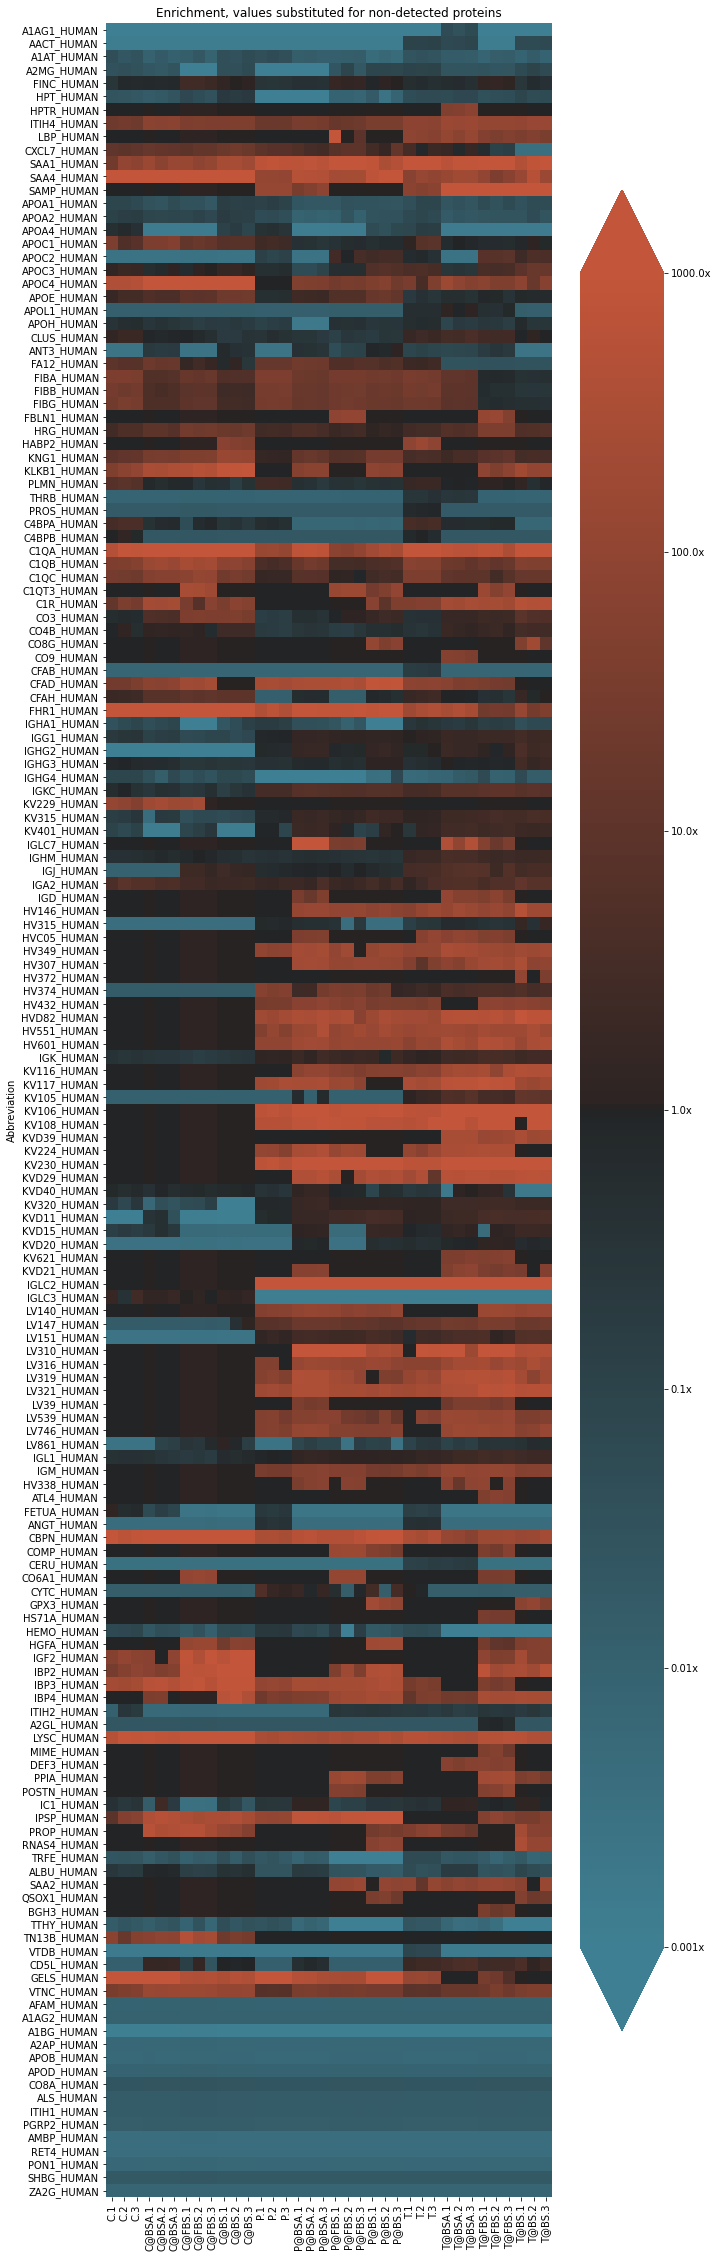

In [8]:
heatmap.name_column = 'Abbreviation'
nones = 0
for f in pd.unique(sf['function'][:]):
    fsf = sf[sf['function']==f]
    fsf = fsf.sort_values(by='Abbreviation')
    mpl.pyplot.figure(figsize=(10,fsf.shape[0]*0.2+2))
    heatmap.heatmap_only_common_proteins(fsf)
    mpl.pyplot.title(f)
    # mpl.pyplot.ylabel('')
    mpl.pyplot.savefig('{}.png'.format(f))

mpl.pyplot.figure(figsize=(10,40))
heatmap.heatmap_only_common_proteins(sf)
mpl.pyplot.title("Enrichment, values substituted for non-detected proteins")


In [9]:
xl_writer.close()




In [ ]:
data_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\data.xlsx",
                        sheet_name="human corona")
fix_merged_headers(data_df)
bg_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\data.xlsx",
                      sheet_name="human control")

pi_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\protein_info.xlsx")

sample_columns = []
for c in data_df.columns:
    if c[-2:] in ['.1', '.2', '.3']:
        sample_columns.append(c)
        print(c)

name_column = 'T: Protein names_x'
control_column = "RPA%"
# control_column = "FBS_%"

heatmap.sample_columns = sample_columns
heatmap.name_column = name_column

xl_writer = pd.ExcelWriter('output.xlsx', mode='w')

In [ ]:
raw_df : pd.DataFrame = data_df.merge(bg_df,
                                      left_on='T: Protein IDs',
                                      right_on='T: Majority protein IDs',
                                      how='outer')
raw_df[name_column] = raw_df[name_column].combine_first(raw_df['T: Protein names_y'])
raw_df['function'] = raw_df['function_x'].combine_first(raw_df['function_y'])

raw_df['T: Protein IDs'] = raw_df['T: Protein IDs'].combine_first(raw_df['T: Majority protein IDs'])
raw_df = raw_df.merge(pi_df,
                      left_on='T: Protein IDs',
                      right_on='ProteinID',
                      how='outer')

raw_df.to_excel("raw_merge.xlsx")


In [ ]:
#make substituted data frame; 0 and NaN are replaced with substituted values; then renormalized
sf = raw_df.copy()

abundance_columns = [control_column] + sample_columns

#minimum value, replace zero with 2x lower than lowest detected
mdf = sf[abundance_columns]
sample_min = mdf[mdf > 0].min().min()
print("Sample min is: {}".format(sample_min))
sample_min = sample_min / 2

#only consider secreted proteins = outside of cell (thus relevant for corona)
sf = sf.drop(sf[~sf['Location'].str.contains('Secreted')].index)
sf.sort_values(by=['function_x', name_column], inplace=True)

#replace values, renormalize
for c in abundance_columns:
    sf[c] = sf[c].replace(0, sample_min)
    sf[c] = sf[c].replace(np.nan, sample_min)
    sf[c] = sf[c] / sf[c].sum()

sf.to_excel(excel_writer=xl_writer, sheet_name="subs sec")
for c in sample_columns:
    sf[c] = sf[c] / sf[control_column]

sf['enrichment_magnitude'] = np.log10(sf[sample_columns]).abs().median(axis=1)
sf.to_excel(excel_writer=xl_writer, sheet_name="subs diff sec")

In [ ]:
#make normal data frame = no substitutions
df = raw_df.copy()

for c in sample_columns:
    df[c] = df[c] / df[control_column]


df['enrichment_magnitude'] = np.log10(df[sample_columns]).abs().median(axis=1)
df.sort_values(by=['function_x'], inplace=True)
df.to_excel(excel_writer=xl_writer, sheet_name="raw diff expr")



In [ ]:
mpl.pyplot.figure(figsize=(10,15))
heatmap.heatmap_only_common_proteins(df)
mpl.pyplot.title("Raw enrichment, only proteins detected in all samples and control")

In [ ]:
mpl.pyplot.figure(figsize=(10,40))
heatmap.heatmap_standin_infinites(df)
mpl.pyplot.title('Raw Enrichment, standins for low and high values')

In [ ]:
heatmap.name_column = 'Abbreviation'
nones = 0
for f in pd.unique(sf['function'][:]):
    fsf = sf[sf['function']==f]
    fsf = fsf.sort_values(by='Abbreviation')
    mpl.pyplot.figure(figsize=(10,fsf.shape[0]*0.2+2))
    heatmap.heatmap_only_common_proteins(fsf)
    mpl.pyplot.title(f)
    # mpl.pyplot.ylabel('')
    mpl.pyplot.savefig('{}.png'.format(f))

mpl.pyplot.figure(figsize=(10,40))
heatmap.heatmap_only_common_proteins(sf)
mpl.pyplot.title("Enrichment, values substituted for non-detected proteins")


In [ ]:
xl_writer.close()




In [ ]:
data_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\data.xlsx",
                        sheet_name="human corona")
fix_merged_headers(data_df)
bg_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\data.xlsx",
                      sheet_name="human control")

pi_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\protein_info.xlsx")

sample_columns = []
for c in data_df.columns:
    if c[-2:] in ['.1', '.2', '.3']:
        sample_columns.append(c)
        print(c)

name_column = 'T: Protein names_x'
control_column = "RPA%"
# control_column = "FBS_%"

heatmap.sample_columns = sample_columns
heatmap.name_column = name_column

xl_writer = pd.ExcelWriter('output.xlsx', mode='w')

In [ ]:
raw_df : pd.DataFrame = data_df.merge(bg_df,
                                      left_on='T: Protein IDs',
                                      right_on='T: Majority protein IDs',
                                      how='outer')
raw_df[name_column] = raw_df[name_column].combine_first(raw_df['T: Protein names_y'])
raw_df['function'] = raw_df['function_x'].combine_first(raw_df['function_y'])

raw_df['T: Protein IDs'] = raw_df['T: Protein IDs'].combine_first(raw_df['T: Majority protein IDs'])
raw_df = raw_df.merge(pi_df,
                      left_on='T: Protein IDs',
                      right_on='ProteinID',
                      how='outer')

raw_df.to_excel("raw_merge.xlsx")


In [ ]:
#make substituted data frame; 0 and NaN are replaced with substituted values; then renormalized
sf = raw_df.copy()

abundance_columns = [control_column] + sample_columns

#minimum value, replace zero with 2x lower than lowest detected
mdf = sf[abundance_columns]
sample_min = mdf[mdf > 0].min().min()
print("Sample min is: {}".format(sample_min))
sample_min = sample_min / 2

#only consider secreted proteins = outside of cell (thus relevant for corona)
sf = sf.drop(sf[~sf['Location'].str.contains('Secreted')].index)
sf.sort_values(by=['function_x', name_column], inplace=True)

#replace values, renormalize
for c in abundance_columns:
    sf[c] = sf[c].replace(0, sample_min)
    sf[c] = sf[c].replace(np.nan, sample_min)
    sf[c] = sf[c] / sf[c].sum()

sf.to_excel(excel_writer=xl_writer, sheet_name="subs sec")
for c in sample_columns:
    sf[c] = sf[c] / sf[control_column]

sf['enrichment_magnitude'] = np.log10(sf[sample_columns]).abs().median(axis=1)
sf.to_excel(excel_writer=xl_writer, sheet_name="subs diff sec")

In [ ]:
#make normal data frame = no substitutions
df = raw_df.copy()

for c in sample_columns:
    df[c] = df[c] / df[control_column]


df['enrichment_magnitude'] = np.log10(df[sample_columns]).abs().median(axis=1)
df.sort_values(by=['function_x'], inplace=True)
df.to_excel(excel_writer=xl_writer, sheet_name="raw diff expr")



In [ ]:
mpl.pyplot.figure(figsize=(10,15))
heatmap.heatmap_only_common_proteins(df)
mpl.pyplot.title("Raw enrichment, only proteins detected in all samples and control")

In [ ]:
mpl.pyplot.figure(figsize=(10,40))
heatmap.heatmap_standin_infinites(df)
mpl.pyplot.title('Raw Enrichment, standins for low and high values')

In [ ]:
heatmap.name_column = 'Abbreviation'
nones = 0
for f in pd.unique(sf['function'][:]):
    fsf = sf[sf['function']==f]
    fsf = fsf.sort_values(by='Abbreviation')
    mpl.pyplot.figure(figsize=(10,fsf.shape[0]*0.2+2))
    heatmap.heatmap_only_common_proteins(fsf)
    mpl.pyplot.title(f)
    # mpl.pyplot.ylabel('')
    mpl.pyplot.savefig('{}.png'.format(f))

mpl.pyplot.figure(figsize=(10,40))
heatmap.heatmap_only_common_proteins(sf)
mpl.pyplot.title("Enrichment, values substituted for non-detected proteins")


In [ ]:
xl_writer.close()




In [ ]:
data_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\data.xlsx",
                        sheet_name="human corona")
fix_merged_headers(data_df)
bg_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\data.xlsx",
                      sheet_name="human control")

pi_df = pd.read_excel("C:\Dropbox\scienceData\corona analysis\shiyao 2021\protein_info.xlsx")

sample_columns = []
for c in data_df.columns:
    if c[-2:] in ['.1', '.2', '.3']:
        sample_columns.append(c)
        print(c)

name_column = 'T: Protein names_x'
control_column = "RPA%"
# control_column = "FBS_%"

heatmap.sample_columns = sample_columns
heatmap.name_column = name_column

xl_writer = pd.ExcelWriter('output.xlsx', mode='w')

In [ ]:
raw_df : pd.DataFrame = data_df.merge(bg_df,
                                      left_on='T: Protein IDs',
                                      right_on='T: Majority protein IDs',
                                      how='outer')
raw_df[name_column] = raw_df[name_column].combine_first(raw_df['T: Protein names_y'])
raw_df['function'] = raw_df['function_x'].combine_first(raw_df['function_y'])

raw_df['T: Protein IDs'] = raw_df['T: Protein IDs'].combine_first(raw_df['T: Majority protein IDs'])
raw_df = raw_df.merge(pi_df,
                      left_on='T: Protein IDs',
                      right_on='ProteinID',
                      how='outer')

raw_df.to_excel("raw_merge.xlsx")


In [ ]:
#make substituted data frame; 0 and NaN are replaced with substituted values; then renormalized
sf = raw_df.copy()

abundance_columns = [control_column] + sample_columns

#minimum value, replace zero with 2x lower than lowest detected
mdf = sf[abundance_columns]
sample_min = mdf[mdf > 0].min().min()
print("Sample min is: {}".format(sample_min))
sample_min = sample_min / 2

#only consider secreted proteins = outside of cell (thus relevant for corona)
sf = sf.drop(sf[~sf['Location'].str.contains('Secreted')].index)
sf.sort_values(by=['function_x', name_column], inplace=True)

#replace values, renormalize
for c in abundance_columns:
    sf[c] = sf[c].replace(0, sample_min)
    sf[c] = sf[c].replace(np.nan, sample_min)
    sf[c] = sf[c] / sf[c].sum()

sf.to_excel(excel_writer=xl_writer, sheet_name="subs sec")
for c in sample_columns:
    sf[c] = sf[c] / sf[control_column]

sf['enrichment_magnitude'] = np.log10(sf[sample_columns]).abs().median(axis=1)
sf.to_excel(excel_writer=xl_writer, sheet_name="subs diff sec")

In [ ]:
#make normal data frame = no substitutions
df = raw_df.copy()

for c in sample_columns:
    df[c] = df[c] / df[control_column]


df['enrichment_magnitude'] = np.log10(df[sample_columns]).abs().median(axis=1)
df.sort_values(by=['function_x'], inplace=True)
df.to_excel(excel_writer=xl_writer, sheet_name="raw diff expr")



In [ ]:
mpl.pyplot.figure(figsize=(10,15))
heatmap.heatmap_only_common_proteins(df)
mpl.pyplot.title("Raw enrichment, only proteins detected in all samples and control")

In [ ]:
mpl.pyplot.figure(figsize=(10,40))
heatmap.heatmap_standin_infinites(df)
mpl.pyplot.title('Raw Enrichment, standins for low and high values')

In [ ]:
heatmap.name_column = 'Abbreviation'
nones = 0
for f in pd.unique(sf['function'][:]):
    fsf = sf[sf['function']==f]
    fsf = fsf.sort_values(by='Abbreviation')
    mpl.pyplot.figure(figsize=(10,fsf.shape[0]*0.2+2))
    heatmap.heatmap_only_common_proteins(fsf)
    mpl.pyplot.title(f)
    # mpl.pyplot.ylabel('')
    mpl.pyplot.savefig('{}.png'.format(f))

mpl.pyplot.figure(figsize=(10,40))
heatmap.heatmap_only_common_proteins(sf)
mpl.pyplot.title("Enrichment, values substituted for non-detected proteins")


In [ ]:
xl_writer.close()


